In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
train_tweets=pd.read_csv('../data/Dataset 1/clean_train_tweets.csv', encoding="utf-8")
train_tweets

,id,label,tweet,length,count
0,1,0,father dysfunctional selfish drags kids dysfun...,55,7
1,2,0,thanks lyft credit use cause offer wheelchair ...,77,11
2,3,0,bihday majesty,14,2
3,4,0,model love u take u time ur,27,7
4,5,0,factsguide society motivation,29,3
...,...,...,...,...,...
31925,31958,0,ate isz youuu,13,3
31926,31959,0,see nina turner airwaves trying wrap mantle ge...,93,14
31927,31960,0,listening sad songs monday morning otw work sad,47,8
31928,31961,1,sikh temple vandalised calgary wso condemns act,47,7


### Create CountVectorizer


In [3]:
#using scikit-learn to transform text into token count vector

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer(
    token_pattern = r"[a-z]+", 
    ngram_range = (1,1), #ngram_range (1,1)= only unigrams, (1,2)=unigrams and bigrams, (2,2)=bigrams
    lowercase = True,
    min_df = 1, #min_df=1 is the default, means ignore terms that appear in less than 1 document/text.
    max_df = 1.0 #max_df=1.0 is the default, means ignore terms that appear in more than 100% of the documents/texts.
)

### Splitting the train dataset into train and development

In [4]:
#to test perfomarnce against the development set, we can split the training dataset into train and dev

from sklearn.model_selection import train_test_split

In [5]:
#15% of train_tweets will be in dev
train, dev= train_test_split(train_tweets, test_size=0.15, random_state=42)

In [6]:
train

,id,label,tweet,length,count
5561,5569,0,excited saturday fake festival sister bihday s...,63,10
5500,5508,0,folks repoing violence france euro 2016 though...,84,13
25832,25861,0,remaster remaster everywhere,28,3
4480,4484,0,happy positive affirmation,26,3
18879,18903,0,inspired grateful aists painters creative peop...,53,7
...,...,...,...,...,...
29802,29834,0,ahhh hea breaks really seemed like keeper bach...,54,8
5390,5398,0,bread x one million loaves bread math carbs li...,58,10
860,861,1,black professor makes assumptions entire race ...,88,13
15795,15816,0,launch new restaurant tuesday buzzing,37,5


In [7]:
dev

,id,label,tweet,length,count
29583,29614,0,tried wedding suit 1st time today much,38,7
2153,2155,0,sent father day gifts today fathersdaygiftidea...,70,8
18511,18535,0,bangkok got 7 shopping cantwaittoseegot 7 omg,45,7
1668,1669,0,lamp head see fragile saw li,28,6
10092,10103,0,3 weeks till interrailing,25,4
...,...,...,...,...,...
22226,22252,0,kwon soon young born day,24,5
18515,18539,1,realitycheck policing america cop audiblechann...,75,7
4749,4753,1,hard believe live world 700 pa hillary thread ...,64,11
31290,31322,0,father day love u papa,22,5


In [8]:
X_train = train['tweet'].values
X_train_vect = count_vector.fit_transform(X_train) #fitting CountVectorizer, transforms trainging data into 
                                                    #matrix representing token counts 
X_train_vect

<27140x34039 sparse matrix of type '<class 'numpy.int64'>'
	with 200746 stored elements in Compressed Sparse Row format>

In [9]:
#vectorized tweets
X_train_vect.shape

(27140, 34039)

In [10]:
#y_train is the labels of tweets
y_train = train['label'].values

In [11]:
y_train.shape

(27140,)

### Logistic Regression Model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
#fitting logreg
logreg=LogisticRegression()
logreg.fit(X_train_vect, y_train)

LogisticRegression()

In [14]:
#vectorizing dev_tweets 
X_dev = dev['tweet'].values
X_dev_vect = count_vector.transform(X_dev) # Note that the vectorizer is already fit, so we only use the transform method.
y_dev = dev['label'].values

In [15]:
#predicting
logreg_predict=logreg.predict(X_dev_vect)

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [17]:
#accuracy score
logreg_acc=accuracy_score(logreg_predict, y_dev)
print("Test accuracy:{:.2f}%" .format(logreg_acc*100))

Test accuracy:95.70%


In [18]:
#confusion matrix
print (confusion_matrix(y_dev, logreg_predict))
print("\n")
print(classification_report(y_dev, logreg_predict))

#confusion matrix TP 4395 -- FP 32  #positives are non_offensive
                # FN 174  -- TN 189  #negatives are offensive

[[4395   32]
 [ 174  189]]


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      4427
           1       0.86      0.52      0.65       363

    accuracy                           0.96      4790
   macro avg       0.91      0.76      0.81      4790
weighted avg       0.95      0.96      0.95      4790



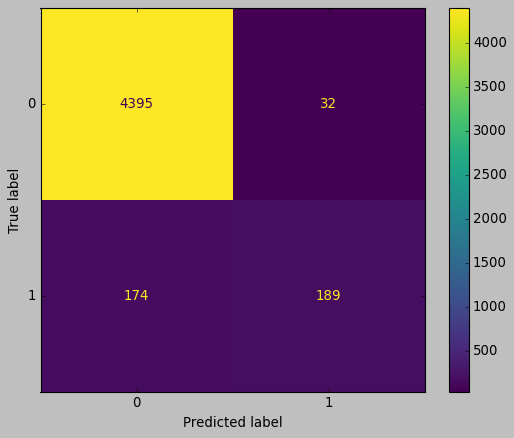

In [19]:
#plotting confusion matrix
style.use('classic')
cm=confusion_matrix(y_dev, logreg_predict, labels=logreg.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)
display.plot()

### Hyperparameter tuning using GridSearchCV and RandomizedSearchCV

In [20]:
#setting up a PredefinedSplit

X_train = train['tweet'].values
y_train = train['label'].values

X_dev = dev['tweet'].values
y_dev = dev['label'].values

X = np.hstack([X_train, X_dev])
y = np.hstack([y_train, y_dev])

In [21]:
#assign 0 to items that are in dev and -1 for the rest
split_train_dev= np.zeros(shape=y.shape)
split_train_dev[:y_train.shape[0]] = -1
pd.value_counts(split_train_dev)

-1.0    27140
 0.0     4790
dtype: int64

### GridSearchCV

In [22]:
from sklearn.model_selection import PredefinedSplit,GridSearchCV

ps = PredefinedSplit(split_train_dev)

In [23]:
param_grid= {'C':[100,10,1.0,0.1, 0.01], 'solver':['newton-cg', 'lbfgs', 'liblinear']}
grid=GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross validation score: {:.2f}" .format(grid.best_score_))
print("Best parameters: ", grid.best_params_)


/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Best cross validation score: 0.96
Best parameters:  {'C': 10, 'solver': 'newton-cg'}


In [24]:
y_pred=grid.predict(X_dev_vect)

In [25]:
logreg_acc=accuracy_score(y_pred, y_dev)
print("Test accuracy: {:.2f}%" .format(logreg_acc*100))

Test accuracy: 96.12%


In [26]:
print(confusion_matrix(y_dev, y_pred))
print("\n")
print(classification_report(y_dev, y_pred))

#confusion matrix from logistic regression 
                                            #TP 4395 -- FP 32  #positives are non_offensive
                                            # FN 174  -- TN 189  #negatives are offensive
        

[[4378   49]
 [ 137  226]]


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4427
           1       0.82      0.62      0.71       363

    accuracy                           0.96      4790
   macro avg       0.90      0.81      0.84      4790
weighted avg       0.96      0.96      0.96      4790



In [27]:
#the F1_score is 70%

from sklearn.metrics import f1_score

f1_score(y_dev, y_pred)

0.7084639498432602

In [28]:
#let's look at all tweets that are offensive but we classified them as non_offensive
idx_error = (y_dev != y_pred) & (y_dev == 1)
print(X_dev[idx_error])

['deeper look' 'pre crime germany places make wear badges'
 'lady said juniors area ask leave someone complained boss defended'
 'wanna mock country b c pt libtards b c' 'stop annoying'
 'clear good reason hand keys goon yet'
 'boycott lying divisive nationalist foxnews add list karma'
 'thank mr president obama light revealed darkness people usa stronger'
 'happyholidays try christmaseve'
 'ebonics pa huge con job blacks liberals running america decades actually lack lan'
 'conormcgregor runs mouth endlessly like rondarousey lost yet ppl take glee losing perhaps'
 'neogaf today another attack japanese chinese claims racist'
 'jonjo shelvey man ever racially abuse someone without saying anything kickitout shelvey'
 '2016 year' 'clickbait much really shitty headline change'
 'biopolitics desire neo nazi fashion icons eugenics'
 'dearfellowwhitepeople 2017 let realize u 2 wear white hood swastika tattoo 2 b r sa'
 'special message land either trump trumpsamerica day 1'
 'latest say thank

In [29]:
#let's look at all tweets that are non_offensive but we classified them as offensive
idx_error1 = (y_dev != y_pred) & (y_dev == 0)
print(X_dev[idx_error])

['deeper look' 'pre crime germany places make wear badges'
 'lady said juniors area ask leave someone complained boss defended'
 'wanna mock country b c pt libtards b c' 'stop annoying'
 'clear good reason hand keys goon yet'
 'boycott lying divisive nationalist foxnews add list karma'
 'thank mr president obama light revealed darkness people usa stronger'
 'happyholidays try christmaseve'
 'ebonics pa huge con job blacks liberals running america decades actually lack lan'
 'conormcgregor runs mouth endlessly like rondarousey lost yet ppl take glee losing perhaps'
 'neogaf today another attack japanese chinese claims racist'
 'jonjo shelvey man ever racially abuse someone without saying anything kickitout shelvey'
 '2016 year' 'clickbait much really shitty headline change'
 'biopolitics desire neo nazi fashion icons eugenics'
 'dearfellowwhitepeople 2017 let realize u 2 wear white hood swastika tattoo 2 b r sa'
 'special message land either trump trumpsamerica day 1'
 'latest say thank

### RandomizedSearchCV

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [31]:
vect_1 = CountVectorizer(
    token_pattern = r"[a-z]+", 
    ngram_range = (1,1),
    lowercase = True,
    min_df = 1,
    max_df = 1.0
)

vect_2 = TfidfVectorizer(
    token_pattern = r"[a-z]+", 
    ngram_range = (1,1),
    lowercase = True,
    min_df = 1,
    max_df = 1.0
)

select = SelectPercentile(score_func=chi2)

clf = LogisticRegression()

pipe = Pipeline([("vect", vect_1), ("select", select), ("clf", clf)])

In [32]:
param_grid = {
    'vect':[vect_1, vect_2],
    'vect__ngram_range':[(1,1), (1,2), (1,3)],
    'vect__min_df':[1, 2, 5, 10, 20],
    'select__percentile':[1, 2, 5, 10, 20, 50],
    'clf__penalty':['l1', 'l2'],
    'clf__C':[1e-4, 1e-3, 1e-2, 0.1, 1.0, 10.0],
    'clf__class_weight':[None, 'balanced']
}

rs = RandomizedSearchCV(pipe, param_grid, n_iter=30, scoring='f1', n_jobs=6, cv=ps, verbose=2)
rs.fit(X, y)
print(rs.best_params_)
print(rs.best_score_)

Fitting 1 folds for each of 30 candidates, totalling 30 fits


/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
17 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_lo

{'vect__ngram_range': (1, 3), 'vect__min_df': 10, 'vect': TfidfVectorizer(min_df=10, ngram_range=(1, 3), token_pattern='[a-z]+'), 'select__percentile': 5, 'clf__penalty': 'l2', 'clf__class_weight': 'balanced', 'clf__C': 10.0}
0.5744125326370757


/Users/vahidehrasekhi/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
y_pred = rs.best_estimator_.predict(X_dev)
confusion_matrix(y_dev, y_pred)

#confusion matrix from logistic regression 
                                            #TP 4395 -- FP 32  #positives are non_offensive
                                            # FN 174  -- TN 189  #negatives are offensive

#confusion matrix with GridSearchCV 
                                            #TP 4378 -- FP 49  #positives are non_offensive
                                            # FN 137  -- TN 226  #negatives are offensive

        
#confusion matrix with RandomSearchCV/Tfidf
                                            #TP 4427 -- FP 0  #positives are non_offensive
                                            # FN 14  -- TN 349 #negatives are offensive


array([[4227,  200],
       [ 120,  243]])

In [34]:
print(classification_report(y_dev, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4427
           1       0.55      0.67      0.60       363

    accuracy                           0.93      4790
   macro avg       0.76      0.81      0.78      4790
weighted avg       0.94      0.93      0.94      4790



In [35]:
f1_score(y_dev, y_pred)

0.6029776674937966

In [36]:
np.mean(y_dev==y_pred)

0.9331941544885177